In [1]:
import pandas as pd
import numpy as np

# set max display rows and columns
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 1000)

# https://www.kaggle.com/datasets/wordsforthewise/lending-club

In [2]:
data = pd.read_csv('accepted_2007_to_2018Q4.csv')

/var/folders/5m/l4xwjn8d3q5bt__g9j08slth0000gn/T/ipykernel_52143/2567533633.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('accepted_2007_to_2018Q4.csv')


In [3]:
data.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

In [4]:
data.shape

(2260701, 151)

## good indicator for delinquency?

In [6]:
data.groupby('term').loan_status.value_counts(normalize=False)

term       loan_status                                        
36 months  Fully Paid                                             857491
           Current                                                566695
           Charged Off                                            163252
           Late (31-120 days)                                      12474
           In Grace Period                                          4834
           Late (16-30 days)                                        2545
           Does not meet the credit policy. Status:Fully Paid       1789
           Does not meet the credit policy. Status:Charged Off       649
           Default                                                    25
60 months  Current                                                311622
           Fully Paid                                             219260
           Charged Off                                            105307
           Late (31-120 days)                                

In [7]:
data.term.value_counts(normalize=True)

term
36 months    0.71207
60 months    0.28793
Name: proportion, dtype: float64

## filter the data set

- only 36 months term
- either charged off or fully paid

In [8]:
loan_statuses = ['Charged Off', 'Fully Paid']

In [9]:
filtered_data = data.query('loan_status in @loan_statuses and term == " 36 months"')

In [10]:
filtered_data.loan_status.value_counts(normalize=True)

loan_status
Fully Paid     0.840066
Charged Off    0.159934
Name: proportion, dtype: float64

### select the features we want to use

In [104]:
# loam_amnt, int_rate, grade, sub_grade, annual_inc, pymnt_plan, dti, purpose, fico_range_high

In [11]:
features = [
    'loan_amnt',
    'int_rate',
    # 'grade',
    'annual_inc',
    'dti',
    'purpose',
    'fico_range_high',
    'issue_d'
]
target = 'loan_status'
filtered_data = filtered_data[features + [target]]
filtered_data = filtered_data.dropna()
filtered_data = filtered_data.reset_index(drop=True)
filtered_data.head(5)

,loan_amnt,int_rate,annual_inc,dti,purpose,fico_range_high,issue_d,loan_status
0,3600.0,13.99,55000.0,5.91,debt_consolidation,679.0,Dec-2015,Fully Paid
1,24700.0,11.99,65000.0,16.06,small_business,719.0,Dec-2015,Fully Paid
2,11950.0,13.44,34000.0,10.20,debt_consolidation,694.0,Dec-2015,Fully Paid
3,20000.0,9.17,180000.0,14.67,debt_consolidation,684.0,Dec-2015,Fully Paid
4,20000.0,8.49,85000.0,17.61,major_purchase,709.0,Dec-2015,Fully Paid


In [12]:
# transform the issue_d column to datetime
filtered_data['issue_d'] = pd.to_datetime(filtered_data['issue_d'], format='%b-%Y')

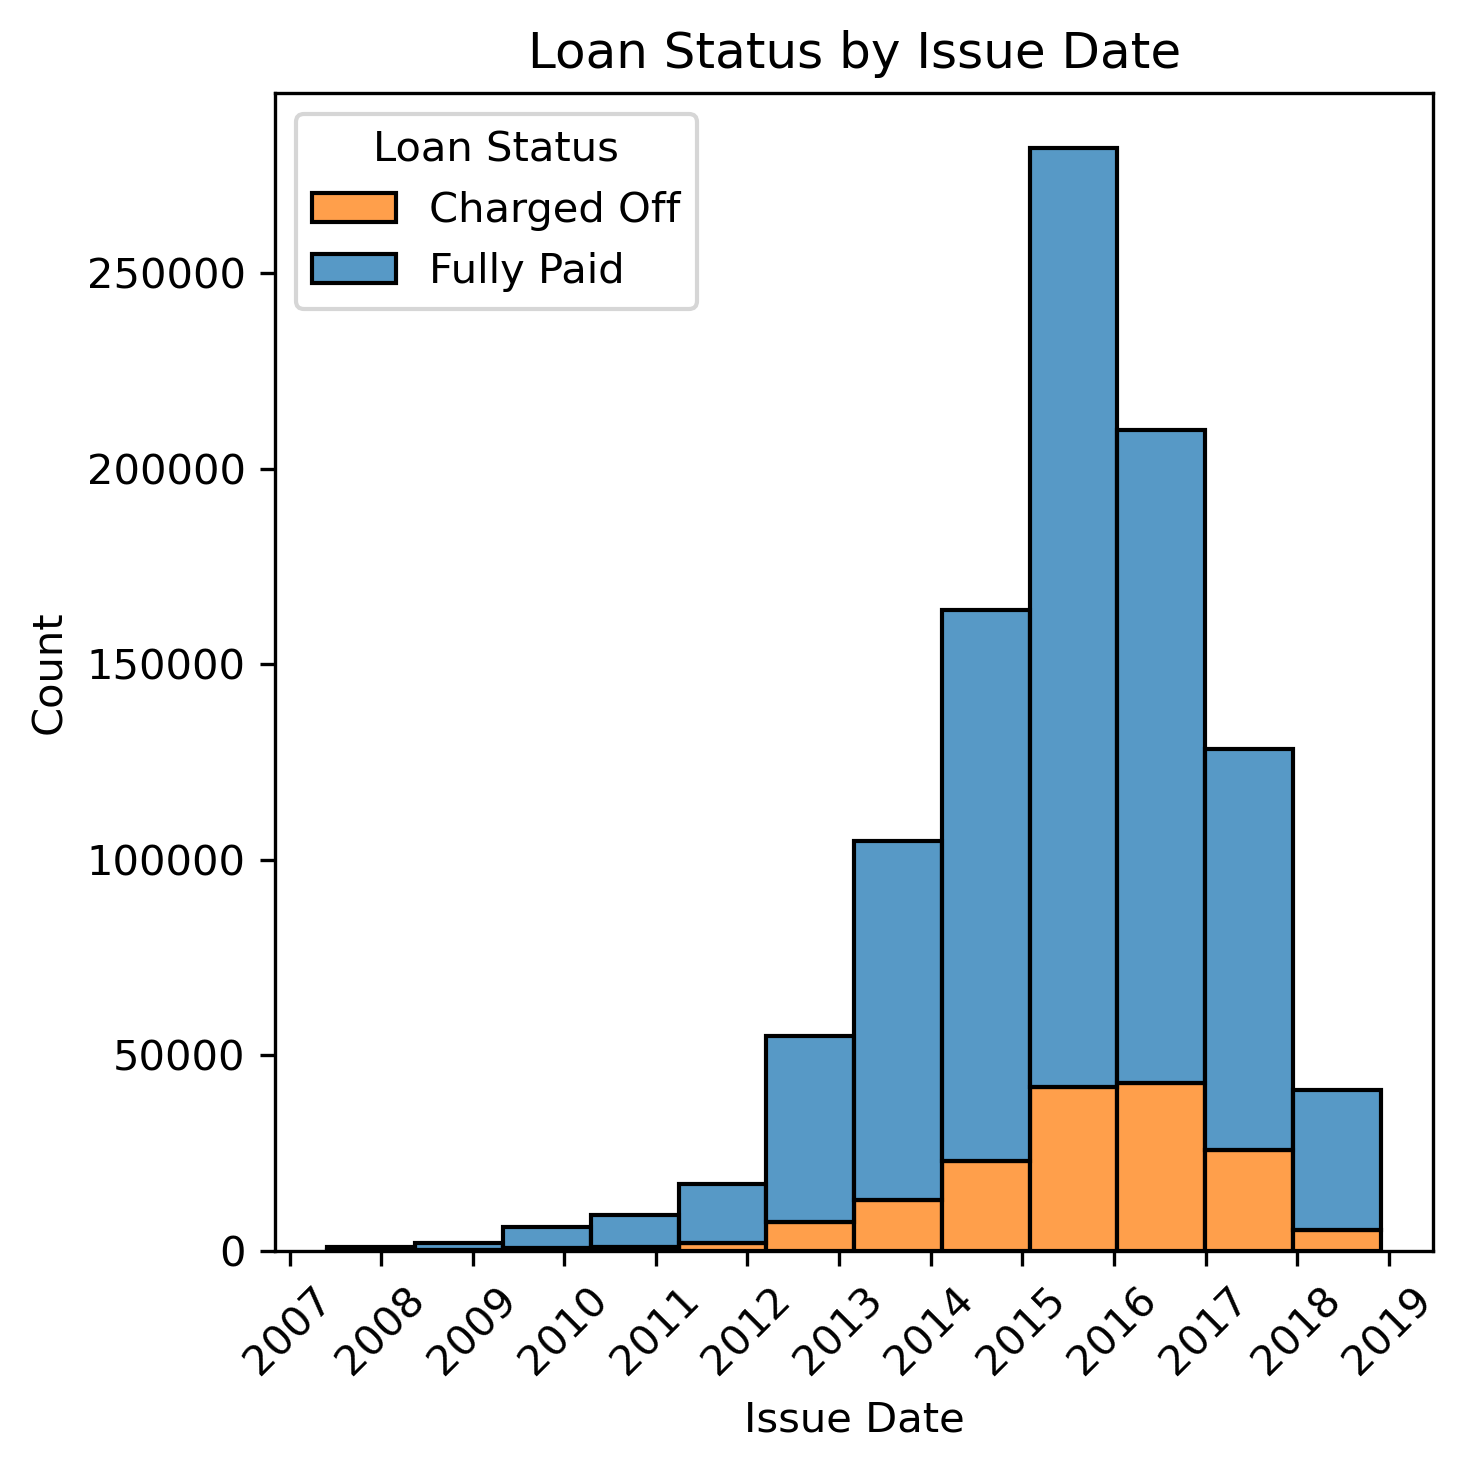

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(5, 5), dpi=300)
sns.histplot(data=filtered_data, x='issue_d', hue='loan_status', multiple='stack', bins=12)
plt.title('Loan Status by Issue Date')
plt.xlabel('Issue Date')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper left', labels=['Charged Off', 'Fully Paid'])

# Set x-ticks to exact years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('loan_status_by_issue_date.png')
plt.show()

In [14]:
# cutoff_dates
cutoff_dates = ['2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01']
cutoff_dates = pd.to_datetime(cutoff_dates)

In [15]:
# we will split the data into 4 train-test splits
# each training set will be from the start of the dataset to the cutoff date
# each test set will be from the cutoff date to 1-year after the cutoff date

train_data = {}
test_data = {}

for cutoff_date in cutoff_dates:
    train_data[cutoff_date] = filtered_data[filtered_data['issue_d'] < cutoff_date]
    test_data[cutoff_date] = filtered_data[(filtered_data['issue_d'] >= cutoff_date) & (filtered_data['issue_d'] < cutoff_date + pd.DateOffset(years=1))]

    print(f'Training set size: {train_data[cutoff_date].shape[0]}')
    print(f'Test set size: {test_data[cutoff_date].shape[0]}')
    print()

Training set size: 335558
Test set size: 283024

Training set size: 618582
Test set size: 232327

Training set size: 850909
Test set size: 128412

Training set size: 979321
Test set size: 41191



In [16]:
X_train = {}
y_train = {}
X_test = {}
y_test = {}
for cutoff_date in cutoff_dates:
    X_train[cutoff_date] = train_data[cutoff_date].drop(columns=[target])
    y_train[cutoff_date] = train_data[cutoff_date][target]
    X_test[cutoff_date] = test_data[cutoff_date].drop(columns=[target])
    y_test[cutoff_date] = test_data[cutoff_date][target]

    # map the target variable to 0 and 1
    y_train[cutoff_date] = y_train[cutoff_date].map({'Charged Off': 1, 'Fully Paid': 0})
    y_test[cutoff_date] = y_test[cutoff_date].map({'Charged Off': 1, 'Fully Paid': 0})

### transforming features for lightgbm

In [17]:
# integer features
int_features = [
    'loan_amnt',
    'fico_range_high',
    'annual_inc',
    'dti'
]
# categorical features
cat_features = [
    # 'grade',
    'purpose'
]
# real valued features
real_features = [
    'int_rate'
]
time_features = [
    'issue_d'
]

In [18]:
lgb_x_train = X_train.copy()
lgb_x_test = X_test.copy()

for cutoff_date in cutoff_dates:
    # convert the integer features to float
    lgb_x_train[cutoff_date][int_features] = lgb_x_train[cutoff_date][int_features].astype(float)
    lgb_x_test[cutoff_date][int_features] = lgb_x_test[cutoff_date][int_features].astype(float)

    # convert the categorical features to one-hot encoding, make sure both train and test sets have the same columns
    lgb_x_train[cutoff_date] = pd.get_dummies(lgb_x_train[cutoff_date], columns=cat_features, drop_first=True)
    lgb_x_test[cutoff_date] = pd.get_dummies(lgb_x_test[cutoff_date], columns=cat_features, drop_first=True)
    # make sure both train and test sets have the same columns
    lgb_x_train[cutoff_date], lgb_x_test[cutoff_date] = lgb_x_train[cutoff_date].align(lgb_x_test[cutoff_date], join='outer', axis=1, fill_value=0)
    # fill the missing columns with 0
    lgb_x_train[cutoff_date] = lgb_x_train[cutoff_date].fillna(0)
    lgb_x_test[cutoff_date] = lgb_x_test[cutoff_date].fillna(0)

    # convert the real valued features to float
    lgb_x_train[cutoff_date][real_features] = lgb_x_train[cutoff_date][real_features].astype(float)
    lgb_x_test[cutoff_date][real_features] = lgb_x_test[cutoff_date][real_features].astype(float)

    # convert the time features to number of months since the start of the dataset
    lgb_x_train[cutoff_date]['issue_d'] = (lgb_x_train[cutoff_date]['issue_d'] - pd.to_datetime('2007-01-01')).dt.days / 30
    lgb_x_test[cutoff_date]['issue_d'] = (lgb_x_test[cutoff_date]['issue_d'] - pd.to_datetime('2007-01-01')).dt.days / 30

In [114]:
# save the dataset containing features and target
lgb_data_path = 'lgb_data/'
for cutoff_date in cutoff_dates:
    lgb_x_train[cutoff_date].to_csv(f'{lgb_data_path}lgb_x_train_{cutoff_date.strftime("%Y%m%d")}.csv', index=False)
    lgb_x_test[cutoff_date].to_csv(f'{lgb_data_path}lgb_x_test_{cutoff_date.strftime("%Y%m%d")}.csv', index=False)
    y_train[cutoff_date].to_csv(f'{lgb_data_path}lgb_y_train_{cutoff_date.strftime("%Y%m%d")}.csv', index=False)
    y_test[cutoff_date].to_csv(f'{lgb_data_path}lgb_y_test_{cutoff_date.strftime("%Y%m%d")}.csv', index=False)


In [ ]:
df_train_test_size = pd.DataFrame({
    'Training set end date': cutoff_dates,
    'Train size': [lgb_x_train[cutoff_date].shape[0] for cutoff_date in cutoff_dates],
    'Test size': [lgb_x_test[cutoff_date].shape[0] for cutoff_date in cutoff_dates]
})

df_train_test_size['Training set end date'] = df_train_test_size['Training set end date'].dt.strftime('%Y-%m-%d')


In [20]:
print(df_train_test_size.set_index('Training set end date').to_latex())

\begin{tabular}{lrr}
\toprule
 & Train size & Test size \\
Training set end date &  &  \\
\midrule
2015-01-01 & 335558 & 283024 \\
2016-01-01 & 618582 & 232327 \\
2017-01-01 & 850909 & 128412 \\
2018-01-01 & 979321 & 41191 \\
\bottomrule
\end{tabular}



### transform features for llm

to reduce the computational needs, we will look at only the train-test split on 20160101

In [21]:
llm_date = '2016-01-01'
llm_date = pd.to_datetime(llm_date)

In [22]:
llm_x_train = X_train[llm_date]
llm_x_test = X_test[llm_date]
llm_y_train = y_train[llm_date]
llm_y_test = y_test[llm_date]

In [23]:
llm_x_train.shape, llm_x_test.shape, llm_y_train.shape, llm_y_test.shape

((618582, 7), (232327, 7), (618582,), (232327,))

In [24]:
llm_x_train['input_text'] = (
    'Loan amount: ' + llm_x_train['loan_amnt'].astype(str) + ', '
    + 'Interest rate: ' + llm_x_train['int_rate'].astype(str) + ', '
    # + 'Grade: ' + llm_x_train['grade'] + ', '
    + 'Annual income: ' + llm_x_train['annual_inc'].astype(str) + ', '
    + 'Debt to income ratio: ' + llm_x_train['dti'].astype(str) + ', '
    + 'Purpose: ' + llm_x_train['purpose'] + ', '
    + 'FICO range high: ' + llm_x_train['fico_range_high'].astype(str) + ', '
    + 'Issue date: ' + llm_x_train['issue_d'].dt.strftime('%Y-%m-%d') + '.'
)
llm_x_test['input_text'] = (
    'Loan amount: ' + llm_x_test['loan_amnt'].astype(str) + ', '
    + 'Interest rate: ' + llm_x_test['int_rate'].astype(str) + ', '
    # + 'Grade: ' + llm_x_test['grade'] + ', '
    + 'Annual income: ' + llm_x_test['annual_inc'].astype(str) + ', '
    + 'Debt to income ratio: ' + llm_x_test['dti'].astype(str) + ', '
    + 'Purpose: ' + llm_x_test['purpose'] + ', '
    + 'FICO range high: ' + llm_x_test['fico_range_high'].astype(str) + ', '
    + 'Issue date: ' + llm_x_test['issue_d'].dt.strftime('%Y-%m-%d') + '.'
)

In [25]:
llm_x_train.input_text[0]

'Loan amount: 3600.0, Interest rate: 13.99, Annual income: 55000.0, Debt to income ratio: 5.91, Purpose: debt_consolidation, FICO range high: 679.0, Issue date: 2015-12-01.'

In [26]:
llm_x_train['label'] = llm_y_train
llm_x_test['label'] = llm_y_test
llm_x_train.head(5)

,loan_amnt,int_rate,annual_inc,dti,purpose,fico_range_high,issue_d,input_text,label
0,3600.0,13.99,55000.0,5.91,debt_consolidation,679.0,2015-12-01,"Loan amount: 3600.0, Interest rate: 13.99, Ann...",0
1,24700.0,11.99,65000.0,16.06,small_business,719.0,2015-12-01,"Loan amount: 24700.0, Interest rate: 11.99, An...",0
2,11950.0,13.44,34000.0,10.20,debt_consolidation,694.0,2015-12-01,"Loan amount: 11950.0, Interest rate: 13.44, An...",0
3,20000.0,9.17,180000.0,14.67,debt_consolidation,684.0,2015-12-01,"Loan amount: 20000.0, Interest rate: 9.17, Ann...",0
4,20000.0,8.49,85000.0,17.61,major_purchase,709.0,2015-12-01,"Loan amount: 20000.0, Interest rate: 8.49, Ann...",0


In [27]:
llm_data_train = llm_x_train[['input_text', 'label']].copy(deep = True)
llm_data_test = llm_x_test[['input_text', 'label']].copy(deep = True)
llm_data_train = llm_data_train.rename(columns={'input_text': 'input', 'label': 'label'})
llm_data_test = llm_data_test.rename(columns={'input_text': 'input', 'label': 'label'})

In [128]:
llm_data_path = 'llm_data/'
llm_data_train.to_json(f'{llm_data_path}train.json', orient='records', lines=True)
llm_data_test.to_json(f'{llm_data_path}test.json', orient='records', lines=True)

In [28]:
llm_data_train.shape

(618582, 2)

In [29]:
llm_data_test.shape

(232327, 2)